In [3]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

data = pd.read_csv("crime_data.csv")
data.head()

Saving crime_data.csv to crime_data (2).csv


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [5]:
states = data.iloc[:, 0]
data = data.iloc[:, 1:]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


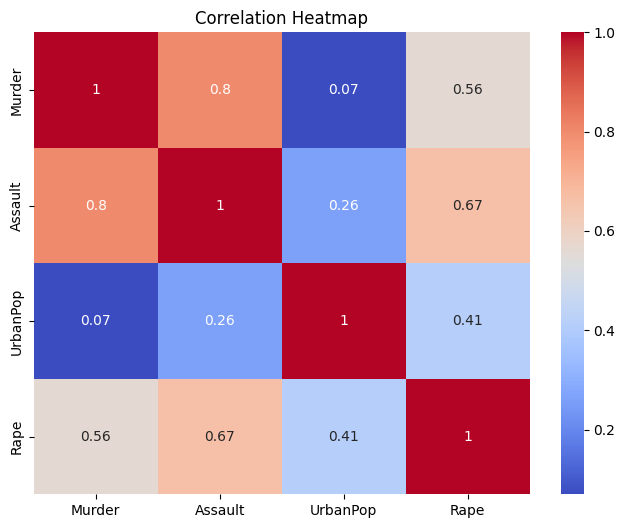

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)


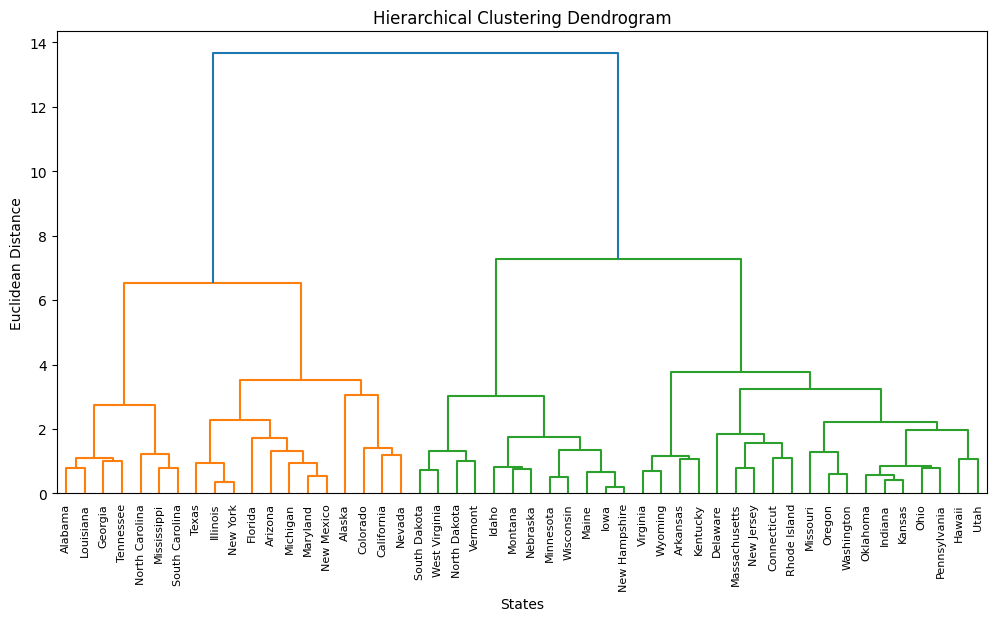

In [9]:
plt.figure(figsize=(12,6))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix, labels=states.values)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("States")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
#Optimal clusters observed = 3

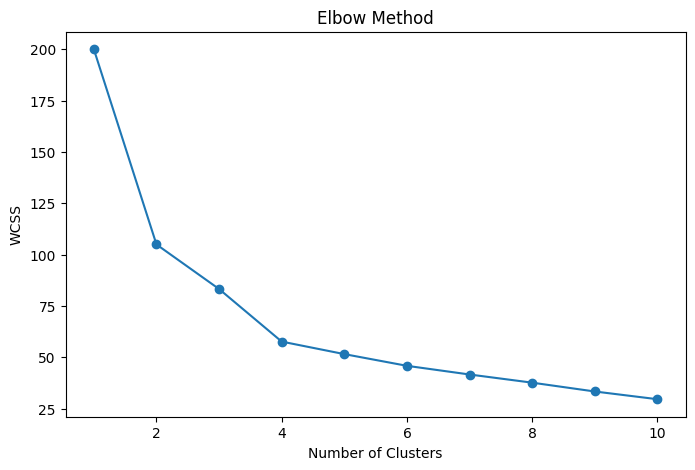

In [10]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

data['Cluster'] = clusters


In [23]:
cluster_profile = data.groupby('Cluster').mean()
cluster_profile


,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,4.734483,111.827586,64.103448,15.820690
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308


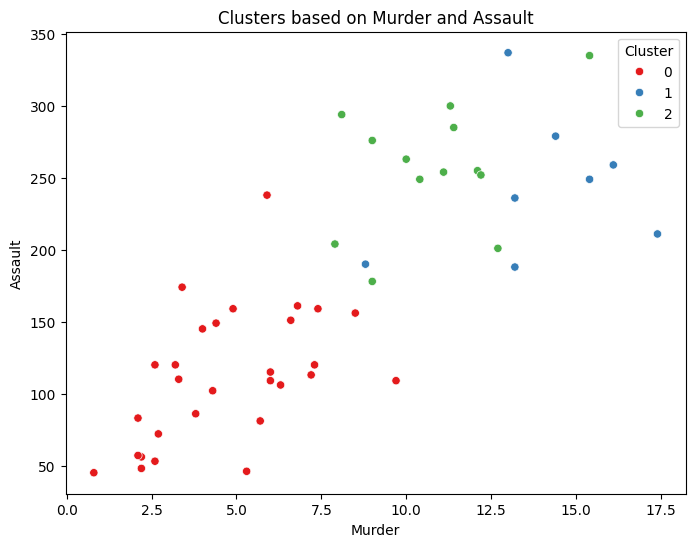

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Murder'],
    y=data['Assault'],
    hue=data['Cluster'],
    palette='Set1'
)
plt.title("Clusters based on Murder and Assault")
plt.show()


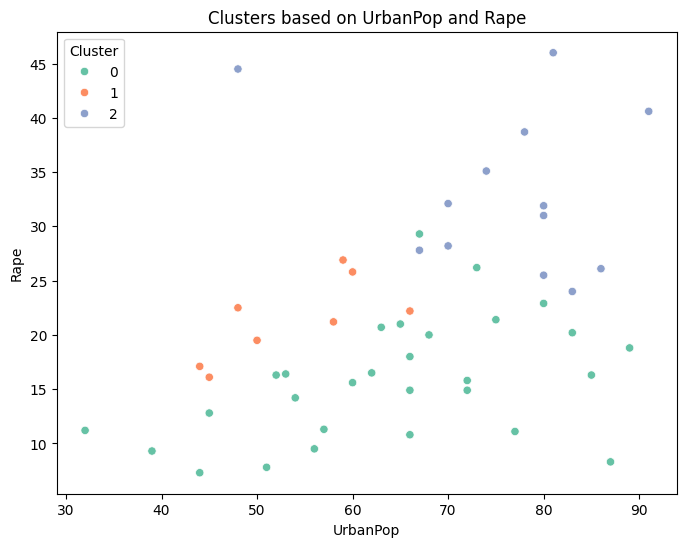

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['UrbanPop'],
    y=data['Rape'],
    hue=data['Cluster'],
    palette='Set2'
)
plt.title("Clusters based on UrbanPop and Rape")
plt.show()


In [17]:
sil_score = silhouette_score(data_scaled, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.36682842761846884


In [18]:
data[['Cluster']].value_counts()


,count
Cluster,
0,29
2,13
1,8


In [ ]:
#Optimal clusters: 3
#High crime cluster → high Murder, Assault, Rape
#Low crime cluster → low values across all metrics
#Both Hierarchical and K-Means agree, validating results